# Linear Regression 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# Importing Dataset
df = pd.read_csv(r'C:\Users\Zainab\Dropbox\PC\Documents\Sem_2\Machine_Learning\data\auto-mpg.csv')

In [3]:
# To check no. of rows and cols
df.shape

(398, 9)

In [4]:
# To check top 5 rows

df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [5]:
# To check bottom 5 rows

df.tail()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
393,27.0,4,140.0,86,2790,15.6,82,1,ford mustang gl
394,44.0,4,97.0,52,2130,24.6,82,2,vw pickup
395,32.0,4,135.0,84,2295,11.6,82,1,dodge rampage
396,28.0,4,120.0,79,2625,18.6,82,1,ford ranger
397,31.0,4,119.0,82,2720,19.4,82,1,chevy s-10


In [6]:
# To check Dtype 

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car name      398 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


In [7]:
# To Describe Data

df.describe().T

,count,mean,std,min,25%,50%,75%,max
mpg,398.0,23.514573,7.815984,9.0,17.500,23.0,29.000,46.6
cylinders,398.0,5.454774,1.701004,3.0,4.000,4.0,8.000,8.0
displacement,398.0,193.425879,104.269838,68.0,104.250,148.5,262.000,455.0
weight,398.0,2970.424623,846.841774,1613.0,2223.750,2803.5,3608.000,5140.0
acceleration,398.0,15.568090,2.757689,8.0,13.825,15.5,17.175,24.8
model year,398.0,76.010050,3.697627,70.0,73.000,76.0,79.000,82.0
origin,398.0,1.572864,0.802055,1.0,1.000,1.0,2.000,3.0


In [8]:
# To check null values and sum of them

df.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model year      0
origin          0
car name        0
dtype: int64

In [9]:
# To check columns

df.columns.str.lower()

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model year', 'origin', 'car name'],
      dtype='object')

In [10]:
a = df[['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model year', 'origin']]
a

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
0,18.0,8,307.0,130,3504,12.0,70,1
1,15.0,8,350.0,165,3693,11.5,70,1
2,18.0,8,318.0,150,3436,11.0,70,1
3,16.0,8,304.0,150,3433,12.0,70,1
4,17.0,8,302.0,140,3449,10.5,70,1
...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86,2790,15.6,82,1
394,44.0,4,97.0,52,2130,24.6,82,2
395,32.0,4,135.0,84,2295,11.6,82,1
396,28.0,4,120.0,79,2625,18.6,82,1


In [11]:
# For loop to check distinct values of each column

for i in a:
    print(i)
    print('      '*20)
    print(df[i].unique().tolist())
    print('      '*20)
    print('------'*20)

mpg
                                                                                                                        
[18.0, 15.0, 16.0, 17.0, 14.0, 24.0, 22.0, 21.0, 27.0, 26.0, 25.0, 10.0, 11.0, 9.0, 28.0, 19.0, 12.0, 13.0, 23.0, 30.0, 31.0, 35.0, 20.0, 29.0, 32.0, 33.0, 17.5, 15.5, 14.5, 22.5, 24.5, 18.5, 29.5, 26.5, 16.5, 31.5, 36.0, 25.5, 33.5, 20.5, 30.5, 21.5, 43.1, 36.1, 32.8, 39.4, 19.9, 19.4, 20.2, 19.2, 25.1, 20.6, 20.8, 18.6, 18.1, 17.7, 27.5, 27.2, 30.9, 21.1, 23.2, 23.8, 23.9, 20.3, 21.6, 16.2, 19.8, 22.3, 17.6, 18.2, 16.9, 31.9, 34.1, 35.7, 27.4, 25.4, 34.2, 34.5, 31.8, 37.3, 28.4, 28.8, 26.8, 41.5, 38.1, 32.1, 37.2, 26.4, 24.3, 19.1, 34.3, 29.8, 31.3, 37.0, 32.2, 46.6, 27.9, 40.8, 44.3, 43.4, 36.4, 44.6, 40.9, 33.8, 32.7, 23.7, 23.6, 32.4, 26.6, 25.8, 23.5, 39.1, 39.0, 35.1, 32.3, 37.7, 34.7, 34.4, 29.9, 33.7, 32.9, 31.6, 28.1, 30.7, 24.2, 22.4, 34.0, 38.0, 44.0]
                                                                                                     

In [12]:
# drop column car name

df = df.drop('car name',axis = 1)

In [13]:
# check if changes occurred

df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
0,18.0,8,307.0,130,3504,12.0,70,1
1,15.0,8,350.0,165,3693,11.5,70,1
2,18.0,8,318.0,150,3436,11.0,70,1
3,16.0,8,304.0,150,3433,12.0,70,1
4,17.0,8,302.0,140,3449,10.5,70,1


In [14]:
# replace origin values with asia, america and europe

df['origin'] = df['origin'].replace({1 : 'America',2:'europe',3: 'Asia'})

In [15]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
0,18.0,8,307.0,130,3504,12.0,70,America
1,15.0,8,350.0,165,3693,11.5,70,America
2,18.0,8,318.0,150,3436,11.0,70,America
3,16.0,8,304.0,150,3433,12.0,70,America
4,17.0,8,302.0,140,3449,10.5,70,America


In [16]:
#Referenced bucketting

In [17]:
# Create Dummy Variables
df = pd.get_dummies(df, columns = ['origin'])
df

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin_America,origin_Asia,origin_europe
0,18.0,8,307.0,130,3504,12.0,70,1,0,0
1,15.0,8,350.0,165,3693,11.5,70,1,0,0
2,18.0,8,318.0,150,3436,11.0,70,1,0,0
3,16.0,8,304.0,150,3433,12.0,70,1,0,0
4,17.0,8,302.0,140,3449,10.5,70,1,0,0
...,...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86,2790,15.6,82,1,0,0
394,44.0,4,97.0,52,2130,24.6,82,0,0,1
395,32.0,4,135.0,84,2295,11.6,82,1,0,0
396,28.0,4,120.0,79,2625,18.6,82,1,0,0


In [18]:
#drop any 1 column of origin bcz if a,b are 0 then c is 1
# a  b  c
# 1  0  0
# 0  1  0
# 0  0  1

In [19]:
df = df.drop('origin_Asia', axis = 1)

# Dealing with missing values 

In [20]:
df.isnull().sum()

mpg               0
cylinders         0
displacement      0
horsepower        0
weight            0
acceleration      0
model year        0
origin_America    0
origin_europe     0
dtype: int64

In [21]:
df.dtypes

mpg               float64
cylinders           int64
displacement      float64
horsepower         object
weight              int64
acceleration      float64
model year          int64
origin_America      uint8
origin_europe       uint8
dtype: object

In [22]:
# if the string is in digits

hp_digit = pd.DataFrame(df.horsepower.str.isdigit())
df[hp_digit['horsepower']==False]                       # will take only those rows where np.nan 

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin_America,origin_europe
32,25.0,4,98.0,?,2046,19.0,71,1,0
126,21.0,6,200.0,?,2875,17.0,74,1,0
330,40.9,4,85.0,?,1835,17.3,80,0,1
336,23.6,4,140.0,?,2905,14.3,80,1,0
354,34.5,4,100.0,?,2320,15.8,81,0,1
374,23.0,4,151.0,?,3035,20.5,82,1,0


In [23]:
#Replace missing values with NaN

df = df.replace('?', np.nan)
df[hp_digit['horsepower']==False]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin_America,origin_europe
32,25.0,4,98.0,NaN,2046,19.0,71,1,0
126,21.0,6,200.0,NaN,2875,17.0,74,1,0
330,40.9,4,85.0,NaN,1835,17.3,80,0,1
336,23.6,4,140.0,NaN,2905,14.3,80,1,0
354,34.5,4,100.0,NaN,2320,15.8,81,0,1
374,23.0,4,151.0,NaN,3035,20.5,82,1,0


In [24]:
# Replace missing values with nan

#df['horsepower'] = df['horsepower'].replace('?', np.nan)
#df

In [25]:
df.median()

mpg                 23.0
cylinders            4.0
displacement       148.5
horsepower          93.5
weight            2803.5
acceleration        15.5
model year          76.0
origin_America       1.0
origin_europe        0.0
dtype: float64

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   mpg             398 non-null    float64
 1   cylinders       398 non-null    int64  
 2   displacement    398 non-null    float64
 3   horsepower      392 non-null    object 
 4   weight          398 non-null    int64  
 5   acceleration    398 non-null    float64
 6   model year      398 non-null    int64  
 7   origin_America  398 non-null    uint8  
 8   origin_europe   398 non-null    uint8  
dtypes: float64(3), int64(3), object(1), uint8(2)
memory usage: 22.7+ KB


In [27]:
#replace missing values with median values
#df = df.fillna(df.median())

df = df.apply(lambda x:x.fillna(x.median()), axis=0)
df['horsepower'] = df['horsepower'].astype('float64') #converting hp columns to 

In [28]:
#df = df.fillna(df.median())

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   mpg             398 non-null    float64
 1   cylinders       398 non-null    int64  
 2   displacement    398 non-null    float64
 3   horsepower      398 non-null    float64
 4   weight          398 non-null    int64  
 5   acceleration    398 non-null    float64
 6   model year      398 non-null    int64  
 7   origin_America  398 non-null    uint8  
 8   origin_europe   398 non-null    uint8  
dtypes: float64(4), int64(3), uint8(2)
memory usage: 22.7 KB


# Bivariate Plots

In [30]:
# df.columns.tolist()
df.columns.str.lower().tolist()

['mpg',
 'cylinders',
 'displacement',
 'horsepower',
 'weight',
 'acceleration',
 'model year',
 'origin_america',
 'origin_europe']

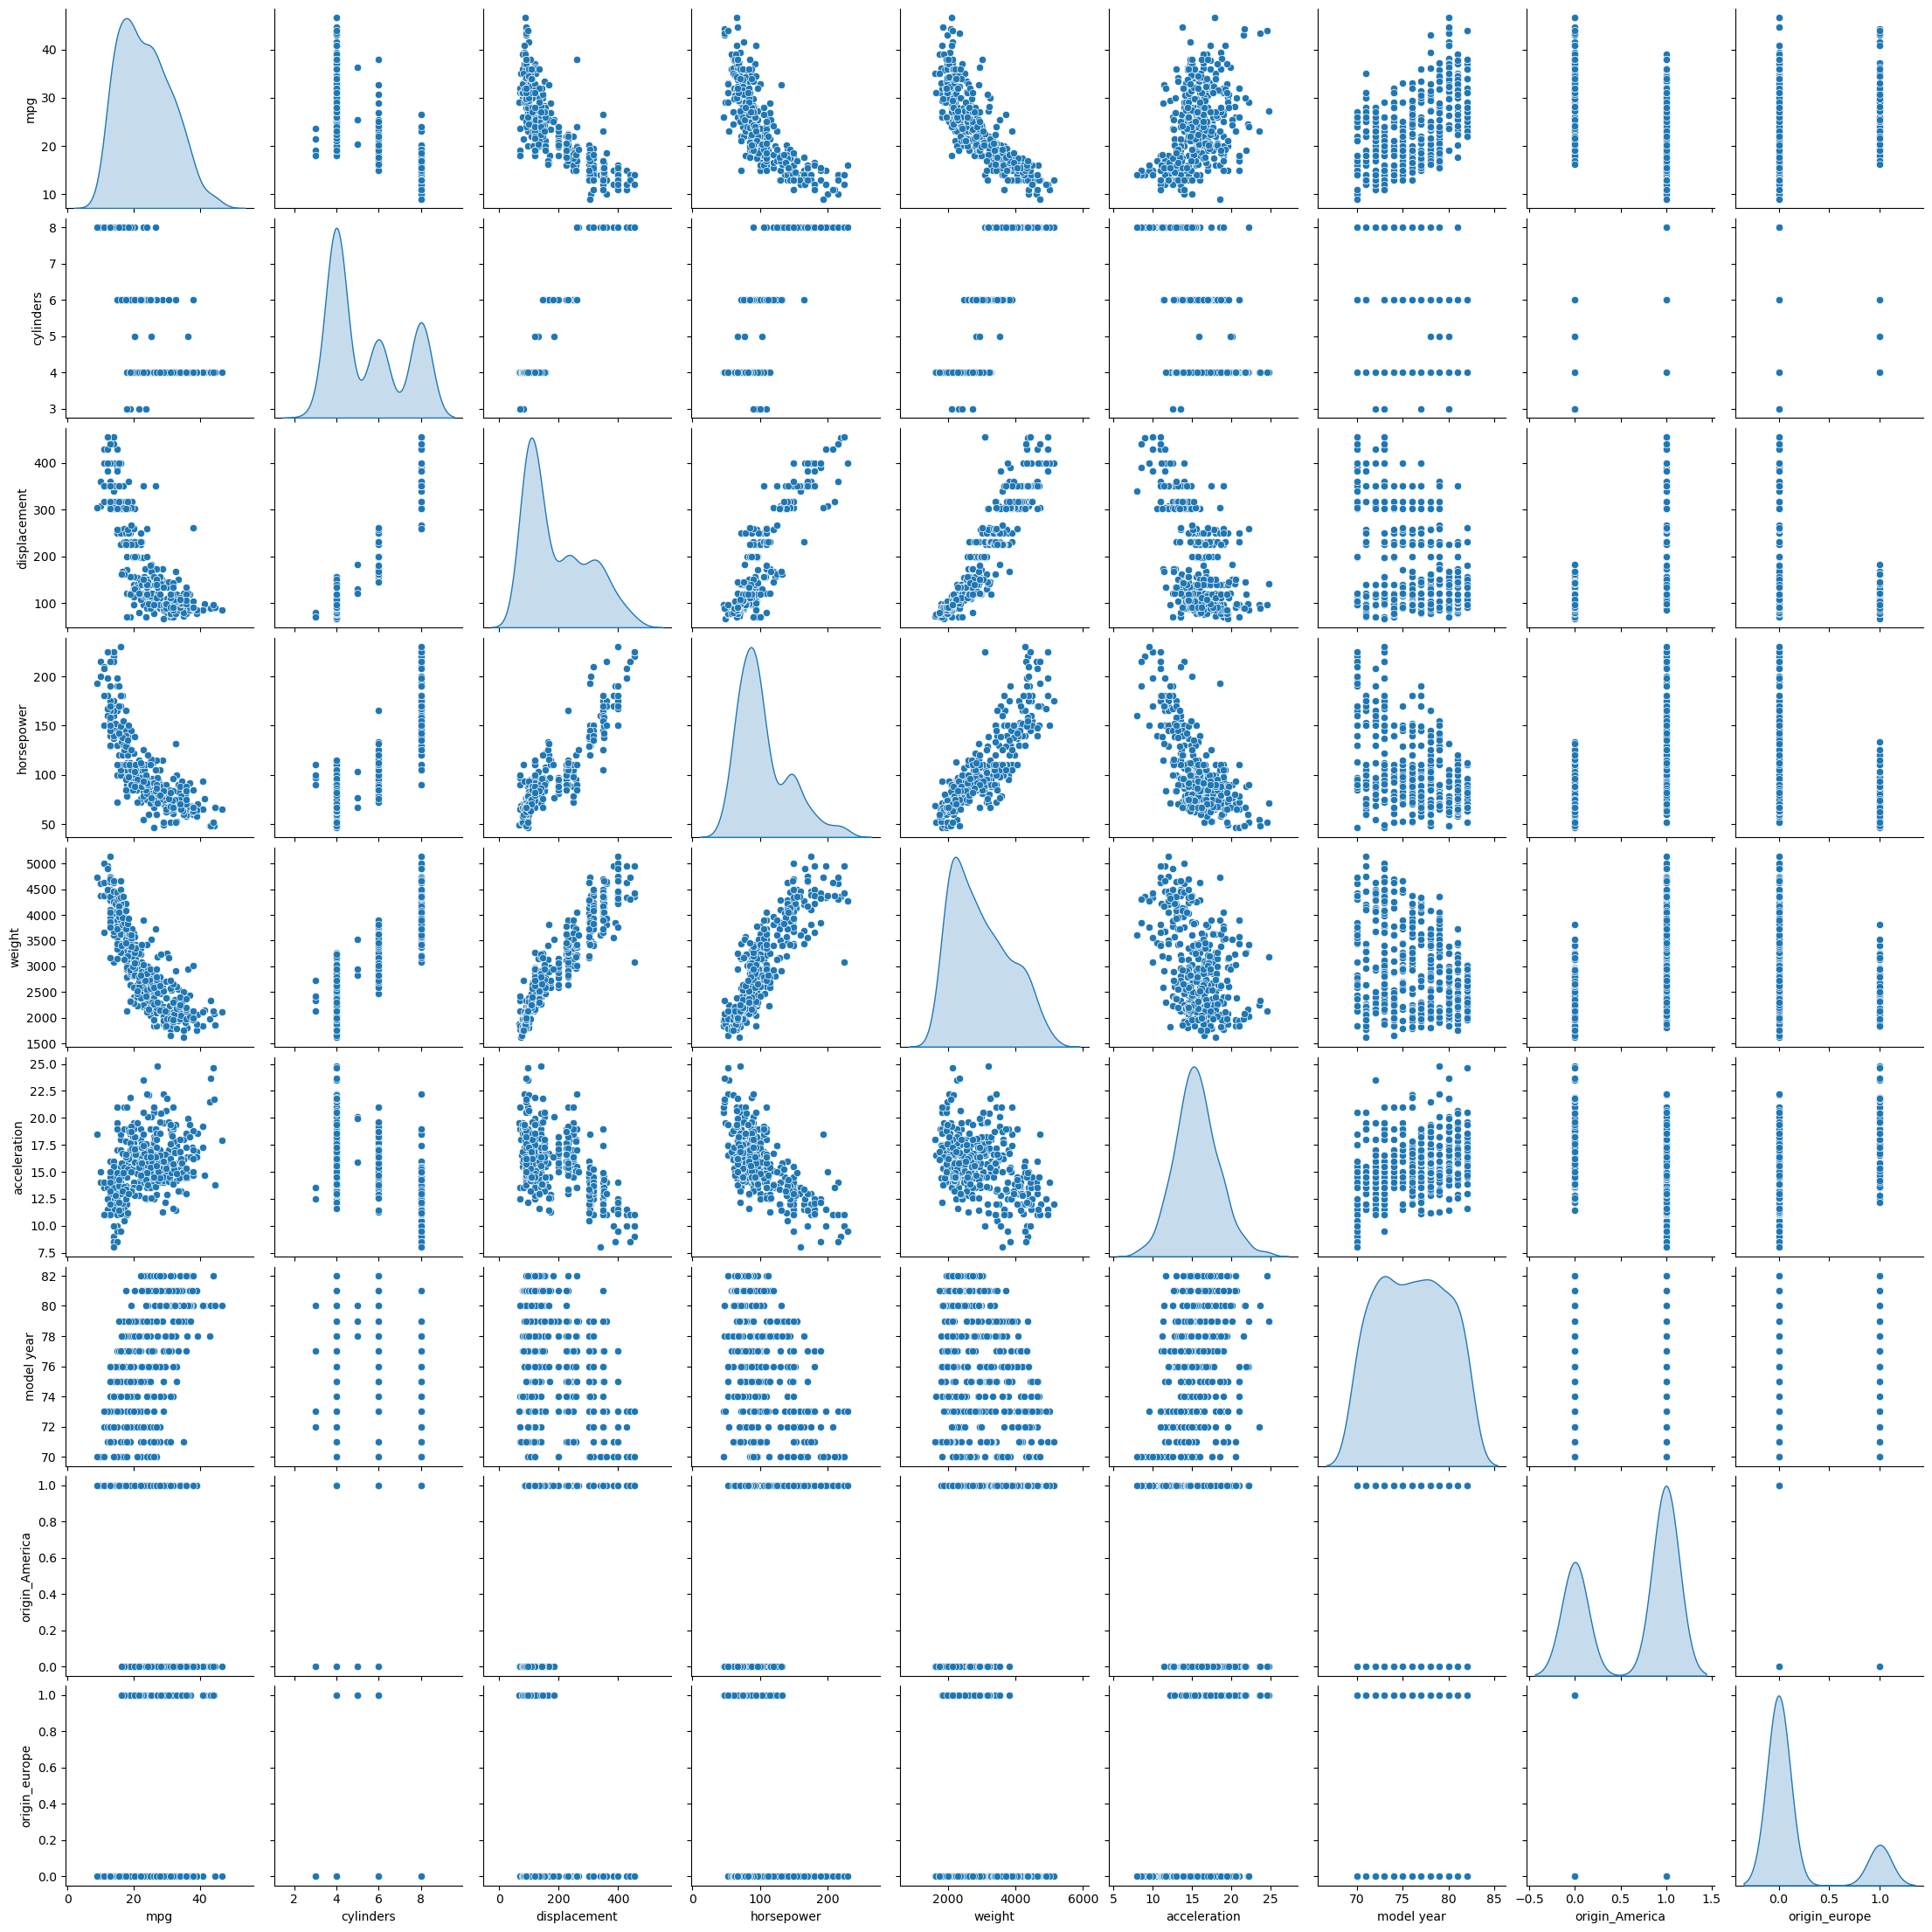

In [31]:
# pair plot
sns.pairplot(df,diag_kind ='kde')

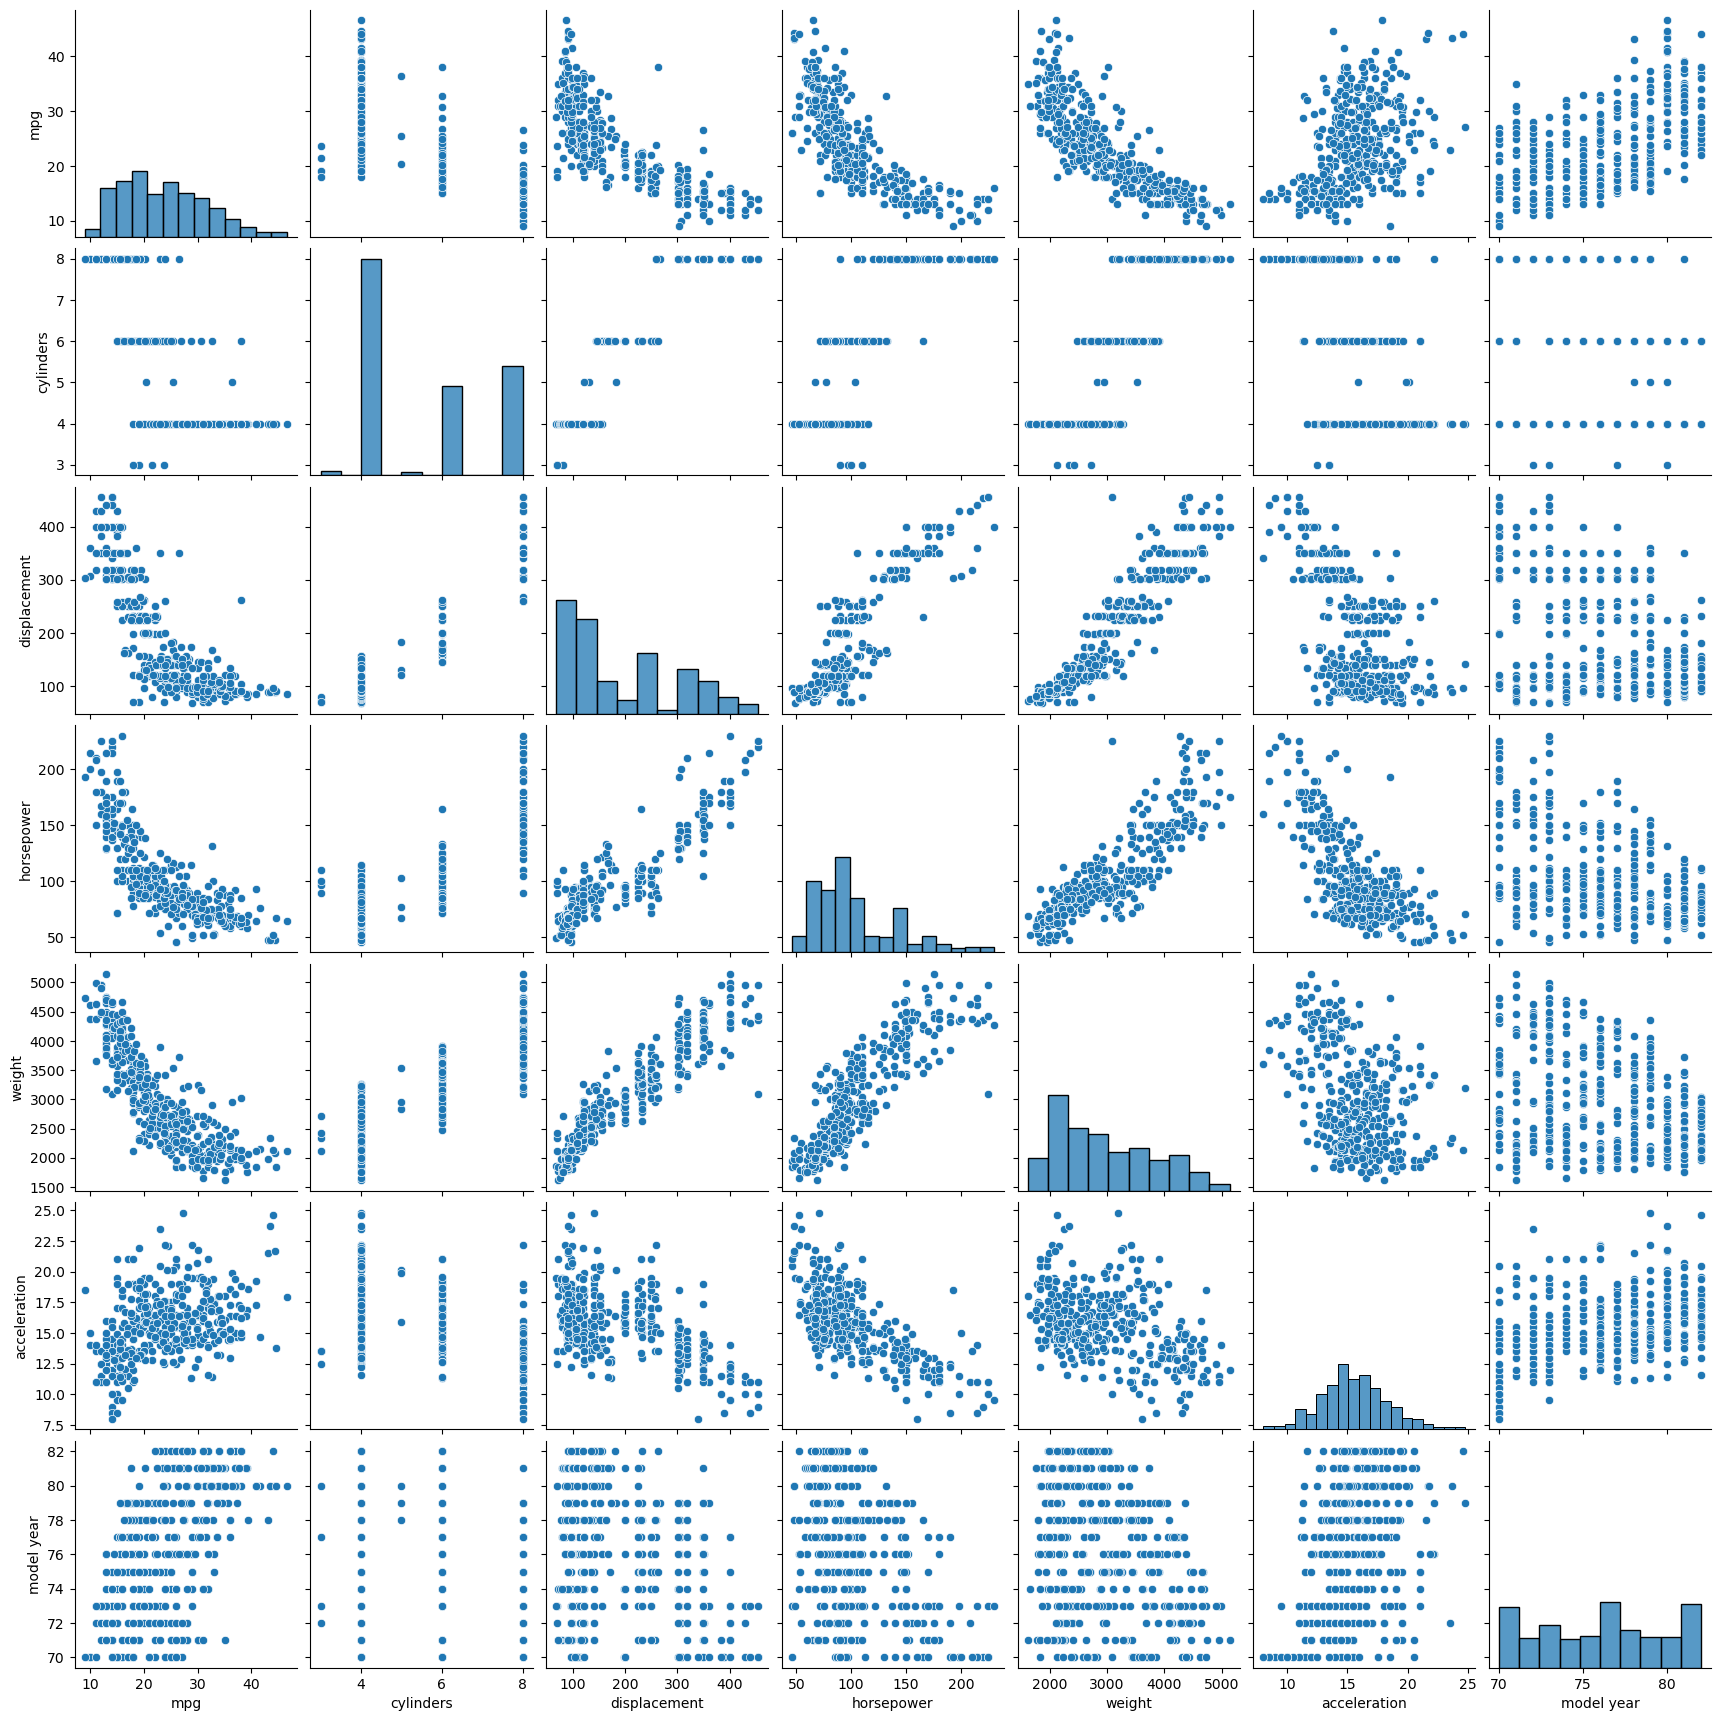

In [32]:
df = df.iloc[:,0:7]
sns.pairplot(df,diag_kind ='auto')

# Splitting Data

In [33]:
from sklearn.model_selection import train_test_split

In [34]:
# providing independent and dependent variables
# Building the linear model
# xs = independent, response, predictor , feature variables
x = df.drop('mpg', axis = 1)
# y is target, dependent variable
y = df['mpg']

In [35]:
#Split X and y into train and test set in 70:30 ratio
#random_state is mandatory, to give you the same output always

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.30 , random_state = 1)

# METHOD 1 - USING SKLEARN

In [36]:
from sklearn.linear_model import LinearRegression

for idx, col_name in enumerate(X_train.columns):
    print('The coefficient for {} is {}'.format(col_name, regression_model.coef_[0][idx]))
    
intercept = regression_model.intercept_[0]
print('The intercept for our model is {}'.format(intercept))

In [37]:
from sklearn.linear_model import LinearRegression

regression_model = LinearRegression()
regression_model.fit(x_train, y_train)

for idx, col_name in enumerate(x_train.columns):
    print('The coefficient for {} is {}'.format(col_name,regression_model.coef_[idx]))

print('   '*20)

intercept = regression_model.intercept_
print('The intercept for our model is {}'.format(intercept))
print('   '*20)

print('R-square value for training data ',
      regression_model.score(x_train, y_train))
print('R-square value for testing data ',
      regression_model.score(x_test, y_test))
print('   '*20)

1 - (1 - regression_model.score(x_train, y_train)) * (x_train.shape[0] - 1) / (
    x_train.shape[0] - x_train.shape[1] - 1)

The coefficient for cylinders is -0.18095805032305984
The coefficient for displacement is 0.010983679987754718
The coefficient for horsepower is -0.00898274748809643
The coefficient for weight is -0.00718819033277062
The coefficient for acceleration is 0.029142901338762905
The coefficient for model year is 0.7883566858707725
                                                            
The intercept for our model is -15.621707993406712
                                                            
R-square value for training data  0.79968038605472
R-square value for testing data  0.8268047501149661
                                                            


0.7952452654507655

In [38]:
regression_model = LinearRegression()
regression_model.fit(x_train, y_train)

LinearRegression()

In [39]:
for idx, col_name in enumerate(x_train.columns):
    print('The coefficient for {} is {}'.format(col_name, regression_model.coef_[idx]))

The coefficient for cylinders is -0.18095805032305984
The coefficient for displacement is 0.010983679987754718
The coefficient for horsepower is -0.00898274748809643
The coefficient for weight is -0.00718819033277062
The coefficient for acceleration is 0.029142901338762905
The coefficient for model year is 0.7883566858707725


In [40]:
intercept = regression_model.intercept_
print('The intercept for our model is {}'.format(intercept))

The intercept for our model is -15.621707993406712


In [41]:
print('R-square value for training data: ',
      regression_model.score(x_train, y_train))
print('R-square value for testing data: ',
      regression_model.score(x_test, y_test))

R-square value for training data:  0.79968038605472
R-square value for testing data:  0.8268047501149661


In [42]:
n = x_train.shape[0] # number of observations
p = x_train.shape[1] # number of predictors
adj_r_squared = 1 - (1 - regression_model.score(x_train, y_train)) * (n - 1) / (n - p - 1)
print('Adjusted R-square value for training data: ', adj_r_squared)

Adjusted R-square value for training data:  0.7952452654507655


# METHOD 2 - STATSMODELS

In [43]:
import statsmodels.api as sm

In [44]:
# Add a constant to the predictor variable x -- sm.add_constant(x_train, prepend = False)
model = sm.OLS(y_train, sm.add_constant(x_train,prepend=False))

In [45]:
# Fit the linear regression model
result = model.fit()

In [46]:
# Print the model summary
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.800
Model:                            OLS   Adj. R-squared:                  0.795
Method:                 Least Squares   F-statistic:                     180.3
Date:                Sun, 26 Mar 2023   Prob (F-statistic):           1.46e-91
Time:                        23:44:42   Log-Likelihood:                -744.60
No. Observations:                 278   AIC:                             1503.
Df Residuals:                     271   BIC:                             1529.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
cylinders       -0.1810      0.433     -0.418      0.677      -1.034       0.672
displacement     0.0110      0.010      1.145      0.253      -0.008       0.030
horsepower      -0.0090      0.017     -0.541      0.589      -0.042       0.024
weight          -0.0072      0.001     -8.326      0.000      -0.009      -0.005
acceleration     0.0291      0.122      0.239      0.811      -0.211       0.269
model year       0.7884      0.064     12.333      0.000       0.663       0.914
const          -15.6217      5.694     -2.743      0.006     -26.833      -4.411
==============================================================================
Omnibus:                       27.346   Durbin-Watson:                   2.229
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               41.717
Skew:                           0.622   Prob(JB):                     8.73e-10
Kurtosis:                       4.433   Cond. No.                     8.19e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.19e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

https://datascience.oneoffcoder.com/estimating-standard-error-coefficients.html

# Checking assumptions

<b> Linearity: </b><li>The relationship between the independent variables and the dependent variable should be linear</li>
                    <li>This means that the change in the dependent variable should be proportional to the change in the                           independent variables.</li>
                    <li>You can plot the independent variables against the dependent variable using scatterplots or partial                         regression plots. If the relationship appears to be non-linear, you may need to transform the                               independent variables or use non-linear regression.</li>

<b>Independence of errors: </b> <li> The errors or residuals (the differences between the predicted and actual values) should be independent of each other.</li><li> This means that the errors for one observation should not be related to the errors for another observation.</li> <li>You can plot the residuals against the predicted values or against the independent variables. </li>
    <li>If there is a pattern in the residuals, such as a U-shape or a curve, this may indicate non-independence of errors.</li>

<b>Homoscedasticity:</b> <li> The variance of the errors should be constant across all levels of the independent variables.</li><li> This means that the spread of the residuals should be similar across the range of the independent variables.</li><li>You can plot the residuals against the predicted values or against the independent variables.</li><li> If the variance of the residuals appears to increase or decrease with the predicted values, this may indicate heteroscedasticity.</li>

<b>Normality: </b><li>The errors should be normally distributed around zero.</li><li> This means that the distribution of the residuals should follow a normal distribution.</li><li>You can plot a histogram of the residuals or use a normal probability plot.</li><li> If the distribution appears to be skewed or have heavy tails, this may indicate non-normality.</li>

<b>No multicollinearity:</b> <li>There should be no perfect linear relationship between the independent variables.</li> <li>This means that each independent variable should provide unique and independent information to the model.</li><li>You can use correlation matrices or variance inflation factors (VIFs) to check for multicollinearity. </li><li>If the correlations between independent variables are high or if the VIFs are greater than 5 or 10, this may indicate multicollinearity.</li>



In [47]:
df = pd.concat([x_train,y_train], axis = 1)
df['y_pred'] = regression_model.predict(x_train)
df['residuals'] = df['mpg']-df['y_pred']
df.head()

,cylinders,displacement,horsepower,weight,acceleration,model year,mpg,y_pred,residuals
350,4,105.0,63.0,2215,14.9,81,34.7,32.611112,2.088888
59,4,97.0,54.0,2254,23.5,72,23.0,25.479167,-2.479167
120,4,121.0,112.0,2868,15.5,73,19.0,21.363441,-2.363441
12,8,400.0,150.0,3761,9.5,70,15.0,14.403729,0.596271
349,4,91.0,68.0,1985,16.0,81,34.1,34.097768,0.002232


# Check Normality of error terms

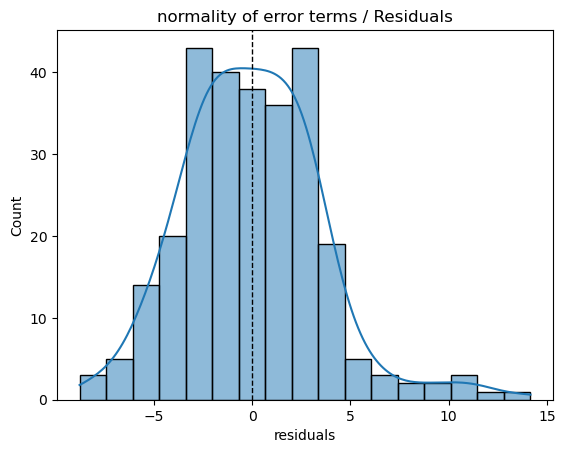

In [48]:
p = sns.histplot(df['residuals'],kde = True)
p = plt.title('normality of error terms / Residuals')
p = plt.axvline(df['residuals'].mean(),color = 'k', linestyle = 'dashed', linewidth = 1)

# Constant variance in error terms

C:\Users\Zainab\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


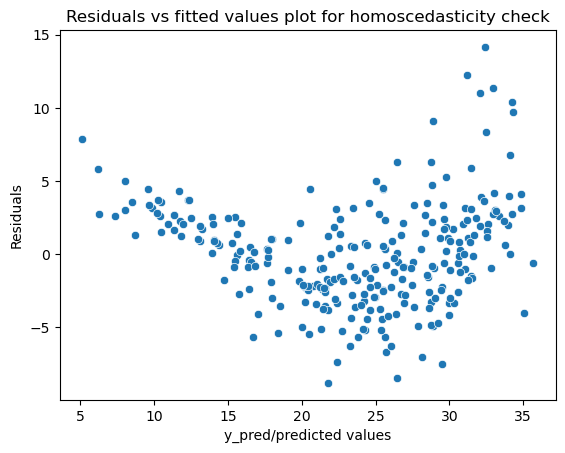

In [49]:
p = sns.scatterplot(df['y_pred'], df['residuals'])
plt.xlabel('y_pred/predicted values')
plt.ylabel('Residuals')
p = plt.title('Residuals vs fitted values plot for homoscedasticity check')

In [50]:
import statsmodels.stats.api as sms
from statsmodels.compat import lzip
name = ['F statistic', 'p-value']
test = sms.het_goldfeldquandt(df['residuals'], x_train)
lzip(name, test)

[('F statistic', 0.8100294504172026), ('p-value', 0.8871421907493916)]

<b><ul><li>Null: Error terms are homoscedastic</li></ul>
    <ul><li>Alt: Error terms are heteroscedastic</li></ul>
    <ul><li>As p-value>0.05, we fail to reject null i.e. error terms have constant variance</li></ul></b>

# No Autocorrelation


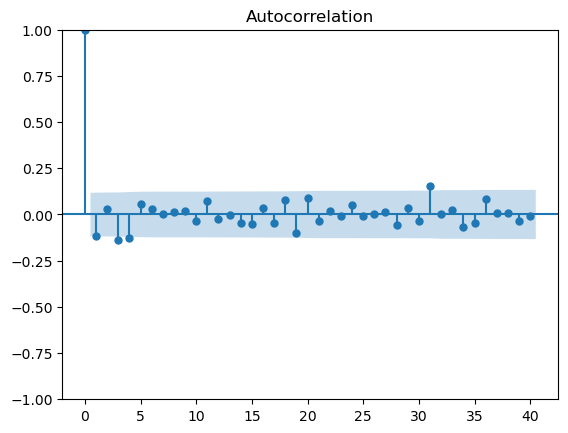

In [51]:
import statsmodels.api as sm
sm.graphics.tsa.plot_acf(df['residuals'], lags=40)
plt.show()

C:\Users\Zainab\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


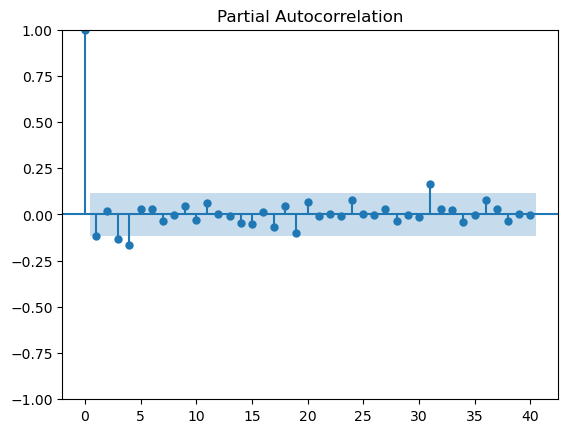

In [52]:
sm.graphics.tsa.plot_pacf(df['residuals'], lags=40)
plt.show()

In [53]:
from statsmodels.stats.stattools import durbin_watson
durbin_watson(df['residuals'])

2.2289894982698764

# Multi-collinearity

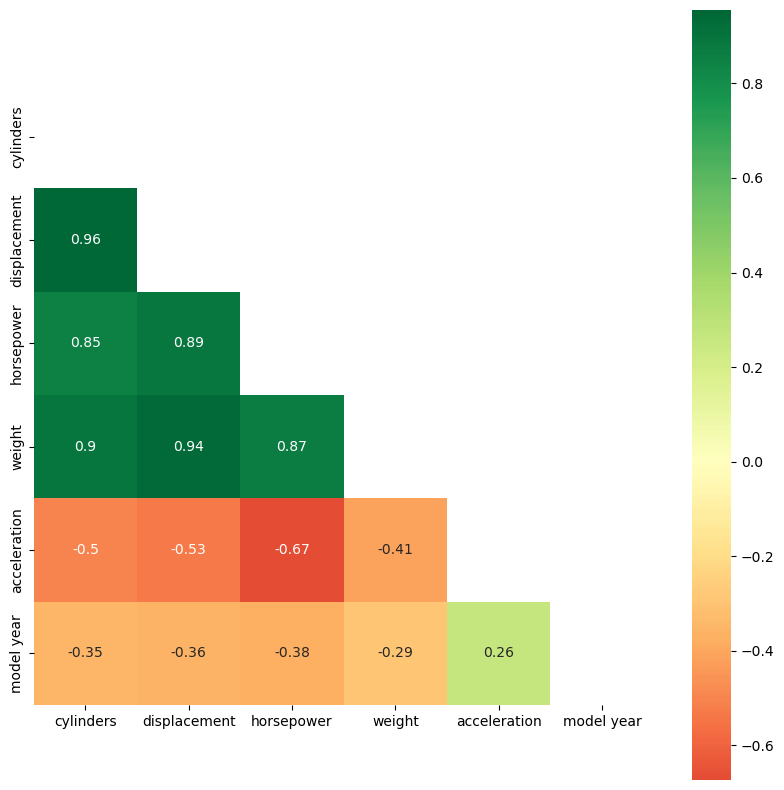

In [54]:
plt.figure(figsize=(10,10))
mask = np.triu(np.ones_like(x_train.corr(), dtype=bool))
p = sns.heatmap(x_train.corr(), mask = mask, annot = True, cmap = 'RdYlGn', square = True, center = 0)

In [55]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif_data = pd.DataFrame()
vif_data['feature'] = x_train.columns
vif_data['VIF'] = [variance_inflation_factor(x_train.values, i)
                          for i in range(len(x_train.columns))]
vif_data

,feature,VIF
0,cylinders,126.237998
1,displacement,93.582674
2,horsepower,59.910827
3,weight,147.846492
4,acceleration,68.083819
5,model year,103.231342


In [56]:
df.head()

,cylinders,displacement,horsepower,weight,acceleration,model year,mpg,y_pred,residuals
350,4,105.0,63.0,2215,14.9,81,34.7,32.611112,2.088888
59,4,97.0,54.0,2254,23.5,72,23.0,25.479167,-2.479167
120,4,121.0,112.0,2868,15.5,73,19.0,21.363441,-2.363441
12,8,400.0,150.0,3761,9.5,70,15.0,14.403729,0.596271
349,4,91.0,68.0,1985,16.0,81,34.1,34.097768,0.002232


# FIX 1

In [57]:
x['c_d'] = x['cylinders']*x['displacement']
x.drop(columns = ['cylinders', 'displacement'], inplace = True)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.30, random_state = 1)
model = sm.OLS(y_train, sm.add_constant(x_train, prepend = False))
result = model.fit()
result.summary()
#LOWER THE 'AIC' VALUE, BETTER THE MODEL

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.806
Model:                            OLS   Adj. R-squared:                  0.803
Method:                 Least Squares   F-statistic:                     226.4
Date:                Sun, 26 Mar 2023   Prob (F-statistic):           1.03e-94
Time:                        23:44:44   Log-Likelihood:                -739.97
No. Observations:                 278   AIC:                             1492.
Df Residuals:                     272   BIC:                             1514.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
horsepower      -0.0203      0.017     -1.221      0.223      -0.053       0.012
weight          -0.0081      0.001    -10.635      0.000      -0.010      -0.007
acceleration     0.0733      0.118      0.619      0.537      -0.160       0.307
model year       0.8121      0.063     12.940      0.000       0.689       0.936
c_d              0.0022      0.001      3.296      0.001       0.001       0.004
const          -15.8569      5.465     -2.902      0.004     -26.616      -5.098
==============================================================================
Omnibus:                       21.373   Durbin-Watson:                   2.199
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               31.807
Skew:                           0.512   Prob(JB):                     1.24e-07
Kurtosis:                       4.303   Cond. No.                     8.80e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.8e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [58]:
vif_data_2 = pd.DataFrame()
vif_data_2['feature'] = x_train.columns

vif_data_2['VIF'] = [variance_inflation_factor(x_train.values, i)
                          for i in range(len(x_train.columns))]

vif_data_2

,feature,VIF
0,horsepower,61.673700
1,weight,119.856562
2,acceleration,66.550538
3,model year,100.688356
4,c_d,24.029190


# FIX 2

In [59]:
x['h_w'] = x['horsepower']*x['weight']
x.drop(columns=['weight','horsepower'], inplace = True)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.30, random_state = 1)
model = sm.OLS(y_train, sm.add_constant(x_train, prepend = False))
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.715
Model:                            OLS   Adj. R-squared:                  0.711
Method:                 Least Squares   F-statistic:                     171.0
Date:                Sun, 26 Mar 2023   Prob (F-statistic):           4.32e-73
Time:                        23:44:44   Log-Likelihood:                -793.73
No. Observations:                 278   AIC:                             1597.
Df Residuals:                     273   BIC:                             1616.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
acceleration    -0.2971      0.113     -2.632      0.009      -0.519      -0.075
model year       0.7164      0.075      9.613      0.000       0.570       0.863
c_d             -0.0022      0.001     -2.895      0.004      -0.004      -0.001
h_w           -1.68e-05   3.47e-06     -4.844      0.000   -2.36e-05   -9.97e-06
const          -17.8680      6.038     -2.959      0.003     -29.755      -5.981
==============================================================================
Omnibus:                       33.032   Durbin-Watson:                   2.203
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               44.695
Skew:                           0.795   Prob(JB):                     1.97e-10
Kurtosis:                       4.154   Cond. No.                     9.39e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.39e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# FIX 4

In [60]:
x = pd.concat([x, df['weight']], axis = 1)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.30, random_state = 1)
model = sm.OLS(y_train, sm.add_constant(x_train, prepend = False))
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.812
Model:                            OLS   Adj. R-squared:                  0.809
Method:                 Least Squares   F-statistic:                     235.2
Date:                Sun, 26 Mar 2023   Prob (F-statistic):           1.55e-96
Time:                        23:44:44   Log-Likelihood:                -735.67
No. Observations:                 278   AIC:                             1483.
Df Residuals:                     272   BIC:                             1505.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
acceleration     0.3113      0.105      2.961      0.003       0.104       0.518
model year       0.8544      0.062     13.850      0.000       0.733       0.976
c_d              0.0013      0.001      1.863      0.064   -7.16e-05       0.003
h_w           1.176e-05   3.71e-06      3.174      0.002    4.47e-06    1.91e-05
weight          -0.0103      0.001    -11.876      0.000      -0.012      -0.009
const          -21.1258      4.916     -4.297      0.000     -30.805     -11.447
==============================================================================
Omnibus:                       18.051   Durbin-Watson:                   2.181
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               25.939
Skew:                           0.454   Prob(JB):                     2.33e-06
Kurtosis:                       4.190   Cond. No.                     9.40e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.4e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [61]:
vif_data_3 = pd.DataFrame()
vif_data_3['feature'] = x_train.columns

vif_data_3['VIF'] = [variance_inflation_factor(x_train.values, i)
                          for i in range(len(x_train.columns))]

vif_data_3

,feature,VIF
0,acceleration,60.912078
1,model year,69.470275
2,c_d,25.343398
3,h_w,49.028539
4,weight,164.712937
